<a href="https://colab.research.google.com/github/Rahul-2045/BIKE-SHARING-DEMAND-PRDICTION/blob/main/TEAM_Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - BIKE SHARING DEMAND PREDICTION


# **Project Type**    - Regression
#**Contribution**    - Team
#  **Team Member 1 -**  RAHUL VERMA
#  **Team Member 2 -**  SUMIT SHARMA
#  **Team Member 3 -**  KHUSHBOO KHANRAH
#  **Team Member 4 -**  VISHAL TOMAR

# **Project Summary -**

Write the summary here within 500-600 words.

In this report, we train a model to predict the number of bike rentals at any hour of the year given the weather conditions. The data set was obtained from the Capital Bikeshare program in Washington, D.C. which contained the historical bike usage pattern with weather data spanning two years.

First we do Exploratory Data Analysis on the data set. We look for missing data values (none were found) and outliers and appropriately modify them. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering to modify few existing columns and drop out irrelavant ones.

We then look at several popular individual models from simple ones like Linear Regressor and Regularization Models (Ridge and Lasso) to more complicated ensemble ones like Random Forest, Gradient Boost and Adaboost. Additionally, few options for model formulation were tried - 1. A single unified model for working and non-working days, 2. Two separate models for working and non-working days, 3. Using OneHotEncoding to get Binary Vector representation of Categorical Features and 4. Using Categorical Features as provided. Finally, we also tried stacking algorithms where the predictions from the level 1 individual models were used as meta-features into a second level model (Linear Regressor, Random Forest and Gradient Boost) to further enhance the predicting capabilities.

The labeled data set provided comprised of the first 19 days of each month while the Data comprised of rental information from 20th to the end of the month. Hyperparameters were tuned using GridSearchCV cross validataion using 5 folds on part of the provided training data set (first 14 days of each month). The remaining data (15th to 19th of each month) were used as hold out set to test our model performance. Of all the methods and models, we found Random Forest Ensemble method using a Single Model and Categorical Feature set an ideal choice with train and test scores of 0.36 and 0.427, respectively. The training and test time for the chosen model are very reasonable (~23 seconds for total train+test observation size = 10871).



# **GitHub Link -**

# https://github.com/Rahulverma2045/BIKE-SHARING-DEMAND-PRDICTION

# **Problem Statement**


**Write Problem Statement Here.**
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

Data Description

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#to display all the graph in the workbook
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [7]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

### Dataset Loading

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset

In [9]:
df = pd.read_csv('/content/SeoulBikeData (1).csv',encoding= 'unicode_escape',parse_dates=[0])

### Dataset First View

In [10]:
# Dataset First Look
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

### Dataset Information

In [12]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [13]:
df=df.astype({'Rented Bike Count':'float','Hour':'object'})

In [14]:
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

In [15]:
df.describe().style.background_gradient()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [16]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-01-12,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### Duplicate Values

In [17]:
# Dataset Duplicate Value Count
# Check for duplicated entries.
print("Duplicate entry in df:",len(df[df.duplicated()]))

Duplicate entry in df: 0


#### Missing Values/Null Values

In [18]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Radiation                0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

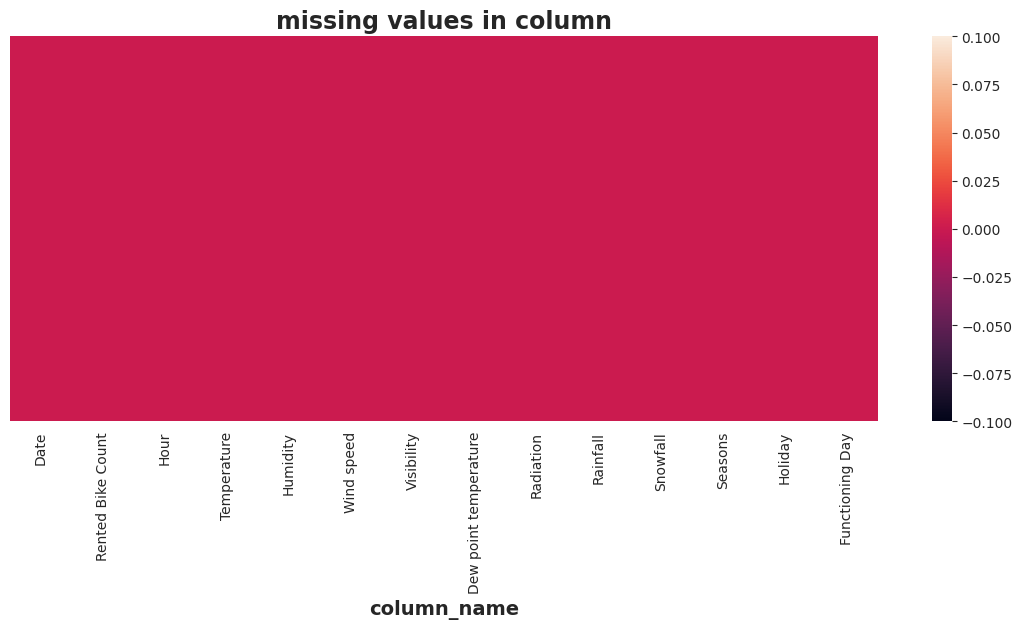

In [19]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

Answer Here

We don't have null or infinite values dataset but have some null values in Rented Bike dataset and we have to deal with it in future.

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

Date                    0.00 %
Rented Bike Count       0.00 %
Hour                    0.00 %
Temperature             0.00 %
Humidity                0.00 %
Wind speed              0.00 %
Visibility              0.00 %
Dew point temperature   0.00 %
Radiation               0.00 %
Rainfall                0.00 %
Snowfall                0.00 %
Seasons                 0.00 %
Holiday                 0.00 %
Functioning Day         0.00 %
dtype: float64


In [21]:
# Dataset Describe
df.describe().style.background_gradient()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

Answer Here

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
df.nunique().sort_values(ascending=True)

Holiday                     2
Functioning Day             2
Seasons                     4
Hour                       24
Snowfall                   51
Rainfall                   61
Wind speed                 65
Humidity                   90
Radiation                 345
Date                      365
Temperature               546
Dew point temperature     556
Visibility               1789
Rented Bike Count        2166
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.
# checking shape of dataset using left join
df_left= pd.merge(df, df, on="Visibility", how= "left")
print(df_left.shape)
print(f"Total number of null values obtained from left join: {df.isna().sum().sum()}")

# checking shape of dataset using right join
df_right= pd.merge(df, df, on="Humidity", how= "right")
print(df_right.shape)
print(f"Total number of null values obtained from right join: {df_right.isna().sum().sum()}")


(5080650, 27)
Total number of null values obtained from left join: 0
(1059624, 27)
Total number of null values obtained from right join: 0


### What all manipulations have you done and insights you found?

Answer Here.

Merging datasets: We don't want to compromise with quality and quantity of our dataset in order to get the best accuracy in ML model implementation. So, we were wondering to use the best join for the good results and we got to know with our R&D that every join is giving the same shape of our merged dataset with 0 null values. So, we have decided to go with the inner join.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [24]:
import missingno as msno

<Axes: >

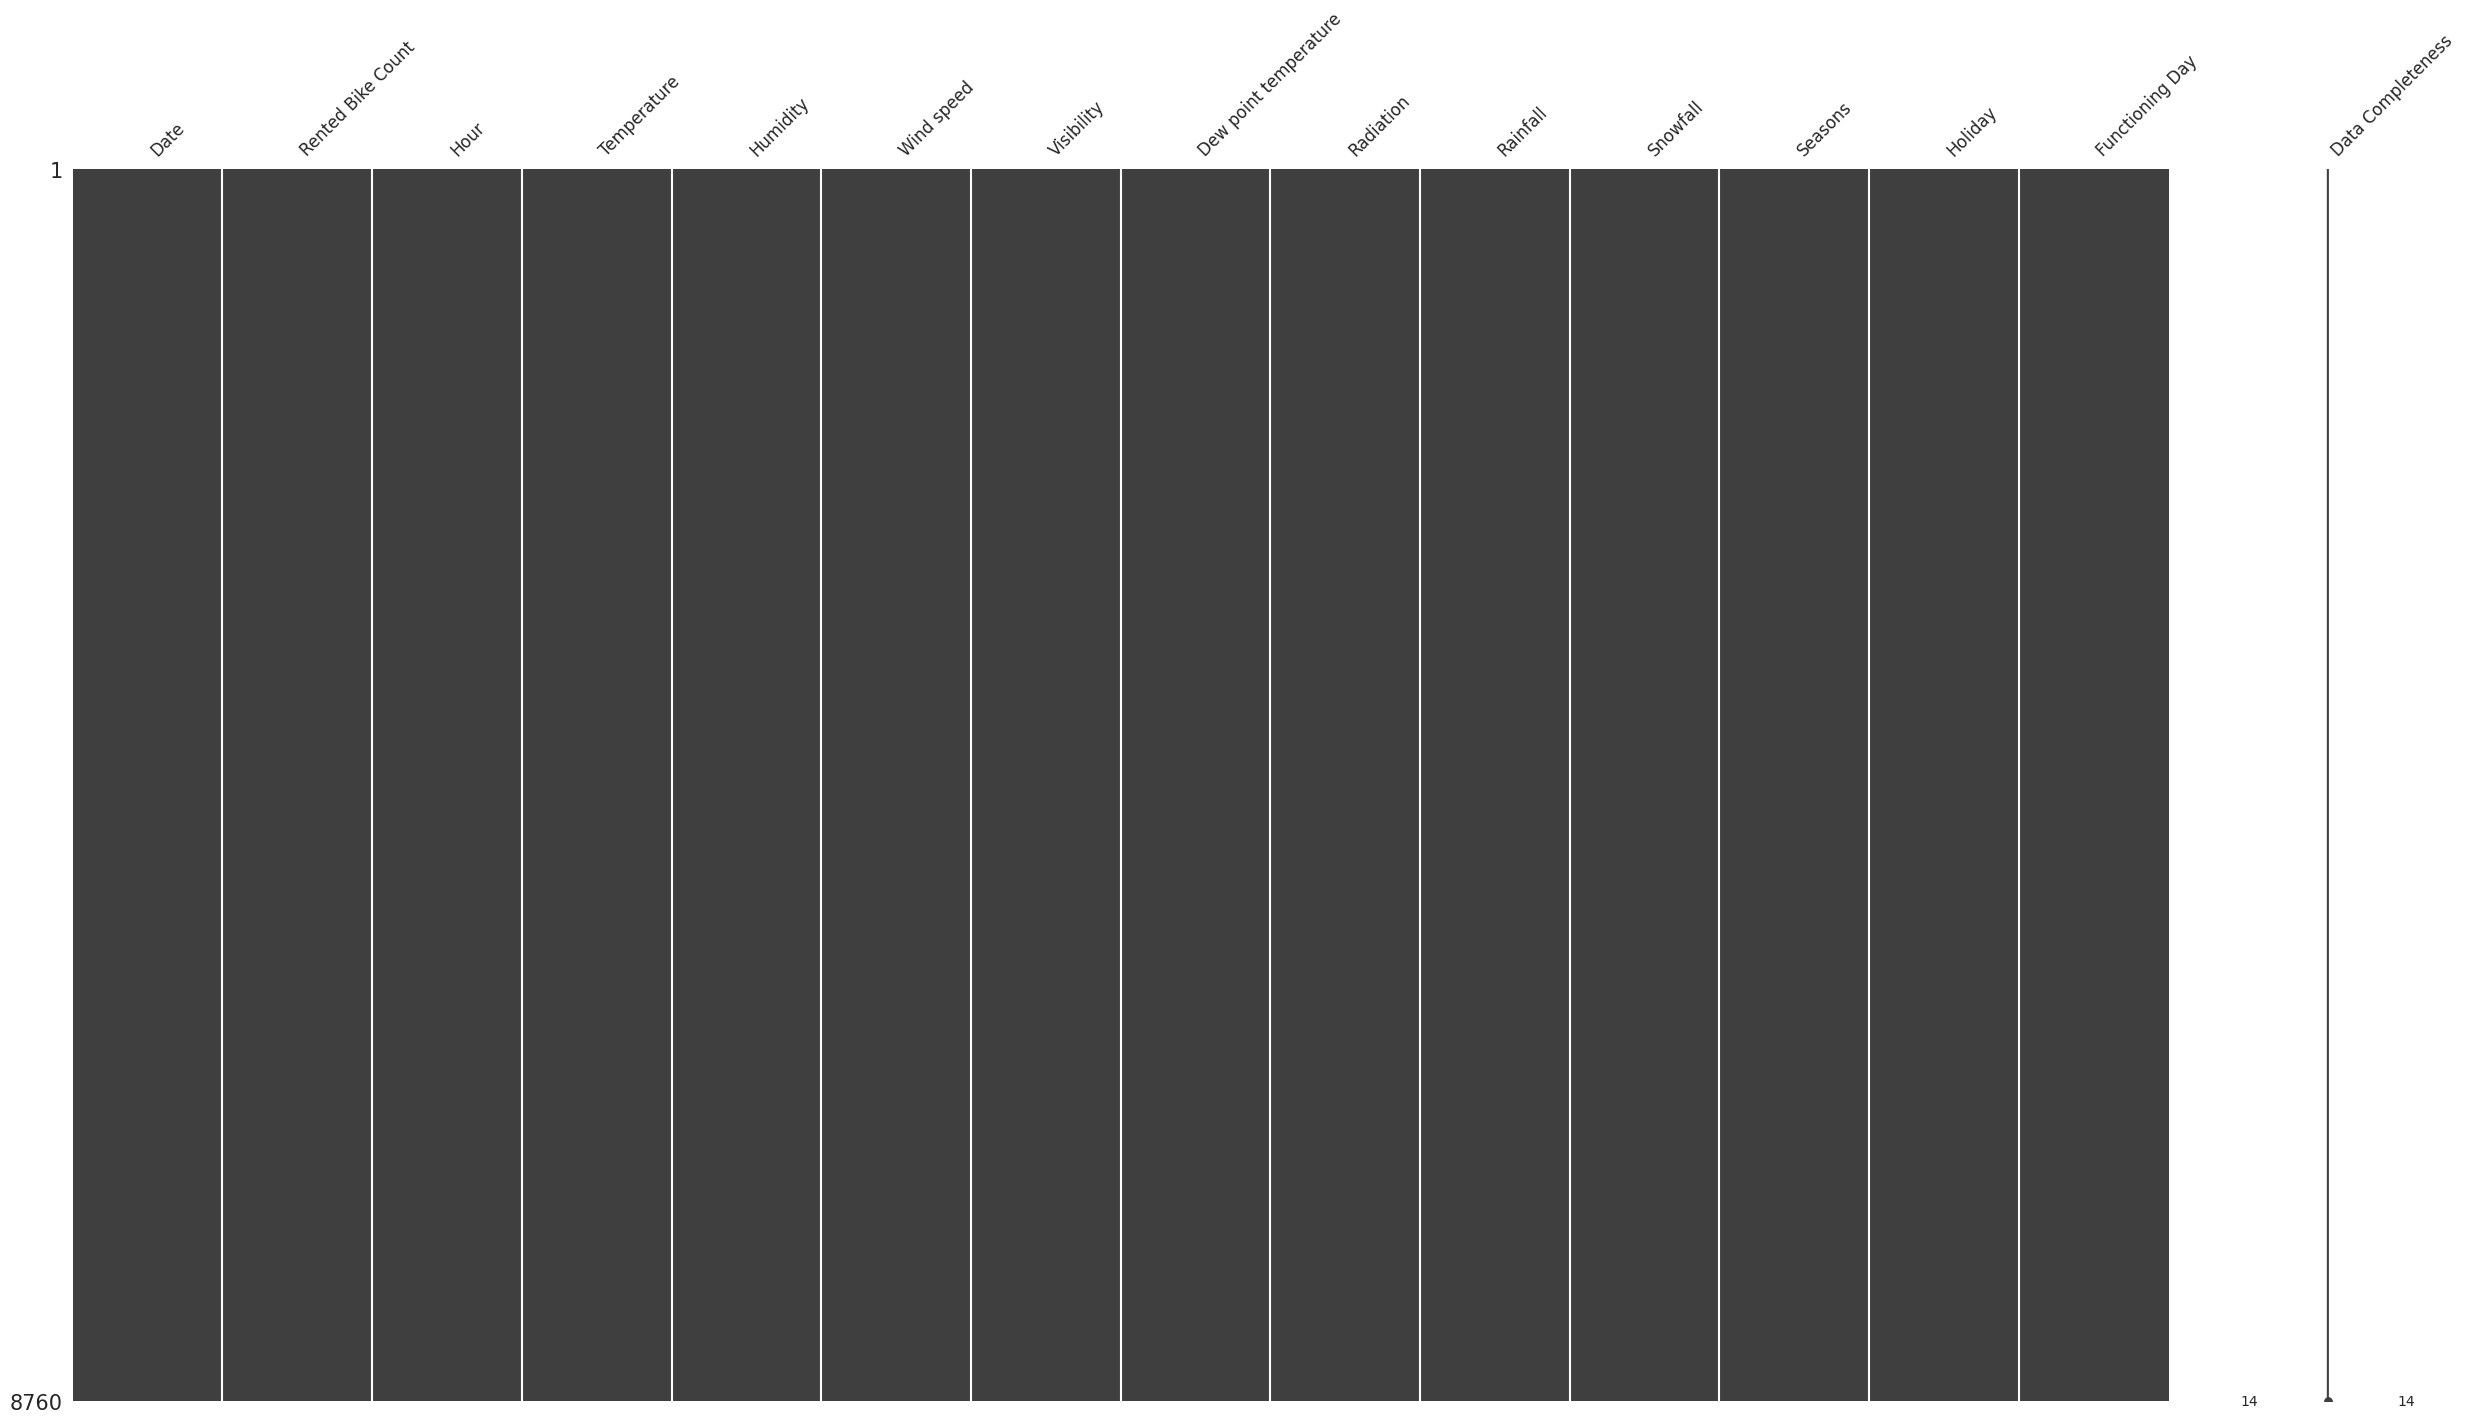

In [25]:
# Chart - 1 visualization code
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)

##### 1. Why did you pick the specific chart?

Answer Here.

We picked this chart as it shows Rented Bike the observations are high or low and also whether they are concentrated in one area or spread out across the entire scale for continous features only.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.
Avarage Rented Bike value is under 8760 and graph is rightly skewed, which shows most of the Bike in data.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

We Matrix plotted graph for data completeness,Rented bike with the help of which we came to know that many competiting Bike are densly located.


#### Chart - 2

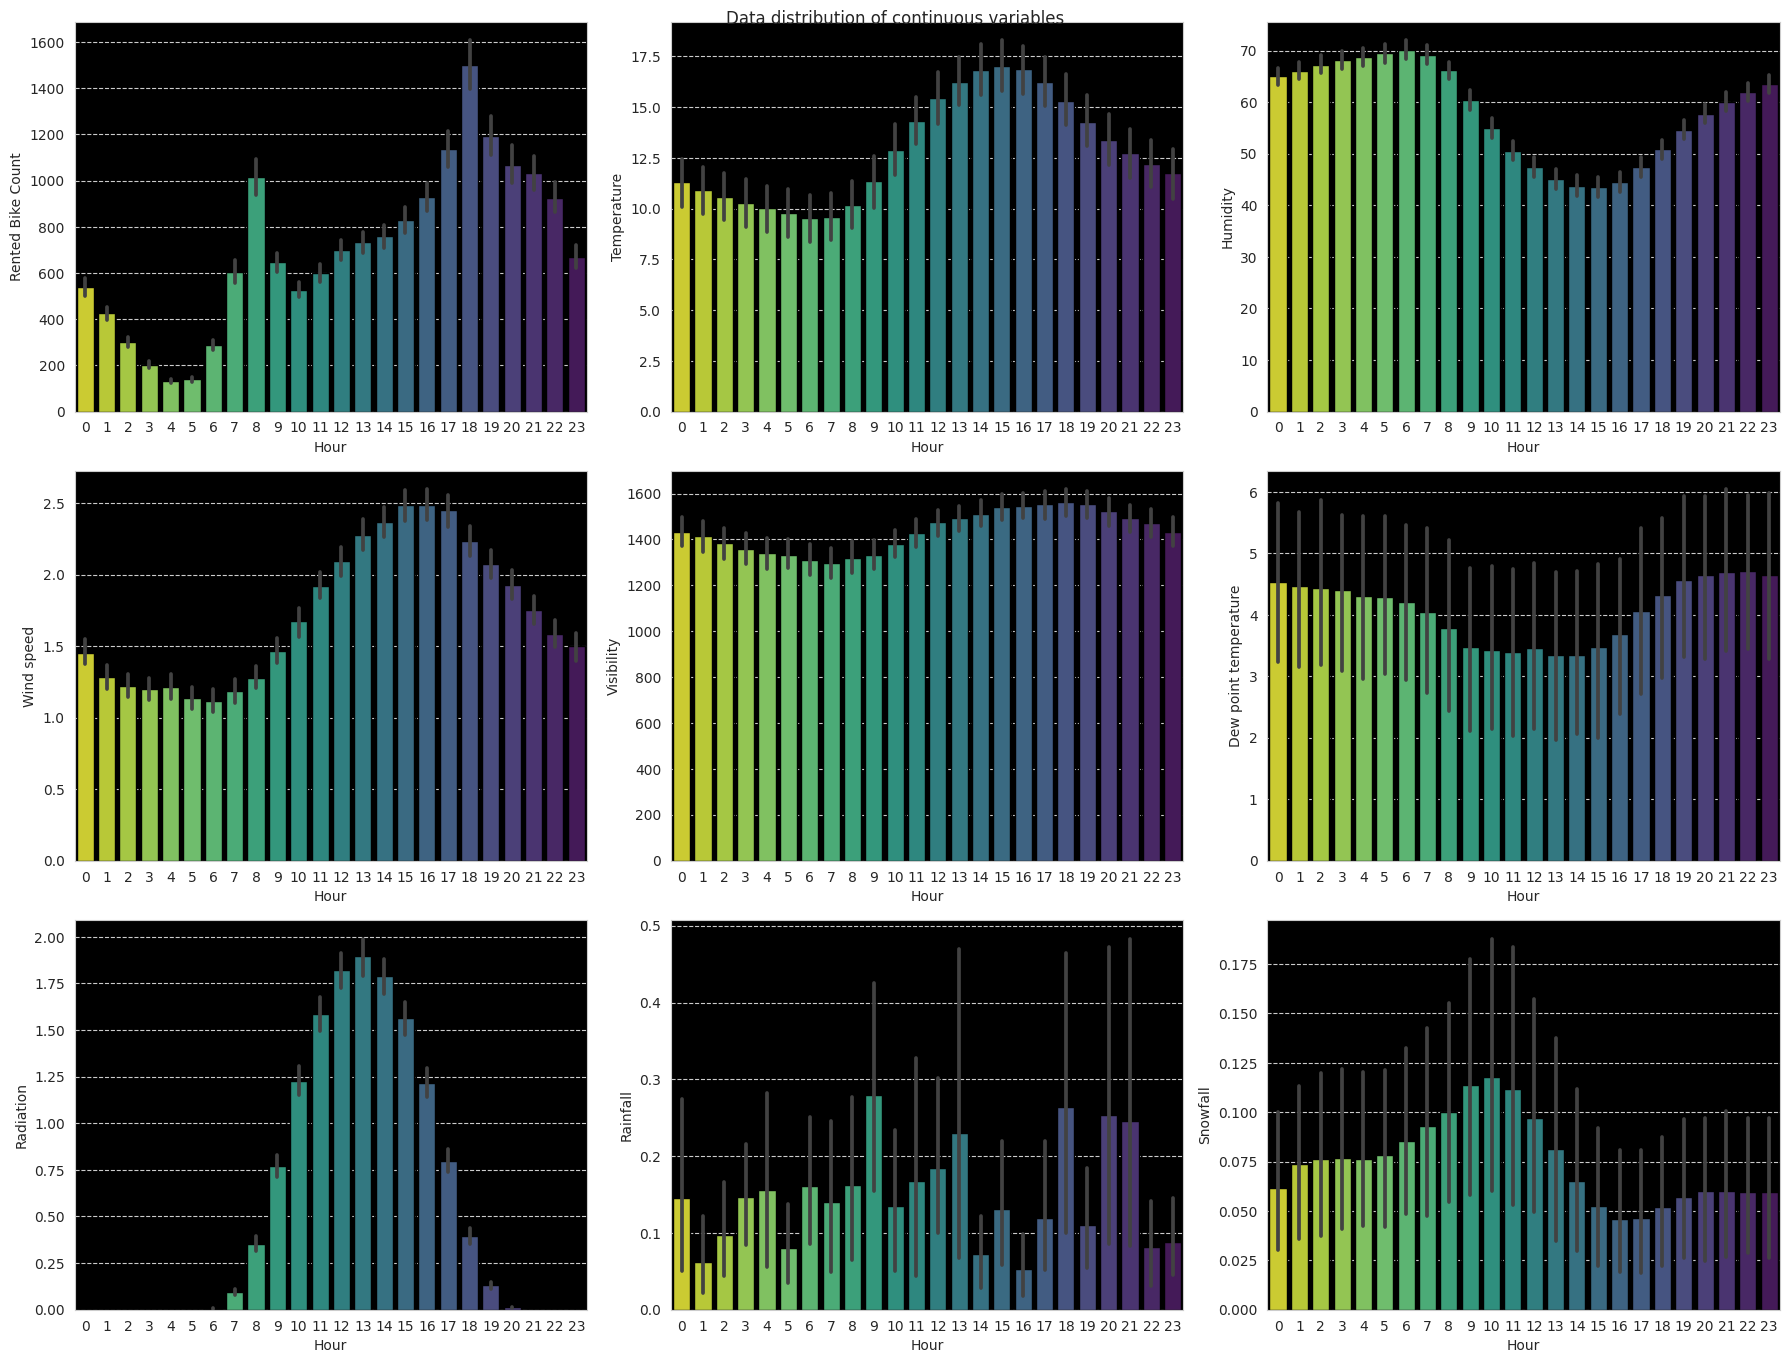

In [26]:
# Chart - 2 visualization code
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.barplot(data=df,x='Hour', y=col, ax=ax,edgecolor="black",palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.
We plotted above graph to know Hour of different type of Bike,Data distribution of continuous variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most of the bike have assortment hour and all data set is very rare .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

As we can see that Bike hous , Humididty is highest and  , Rainfall is lowest in number. So it's quite intersting to see weather these assortments and Bike will also get the heighest in analysis also!!!

#### Chart - 3

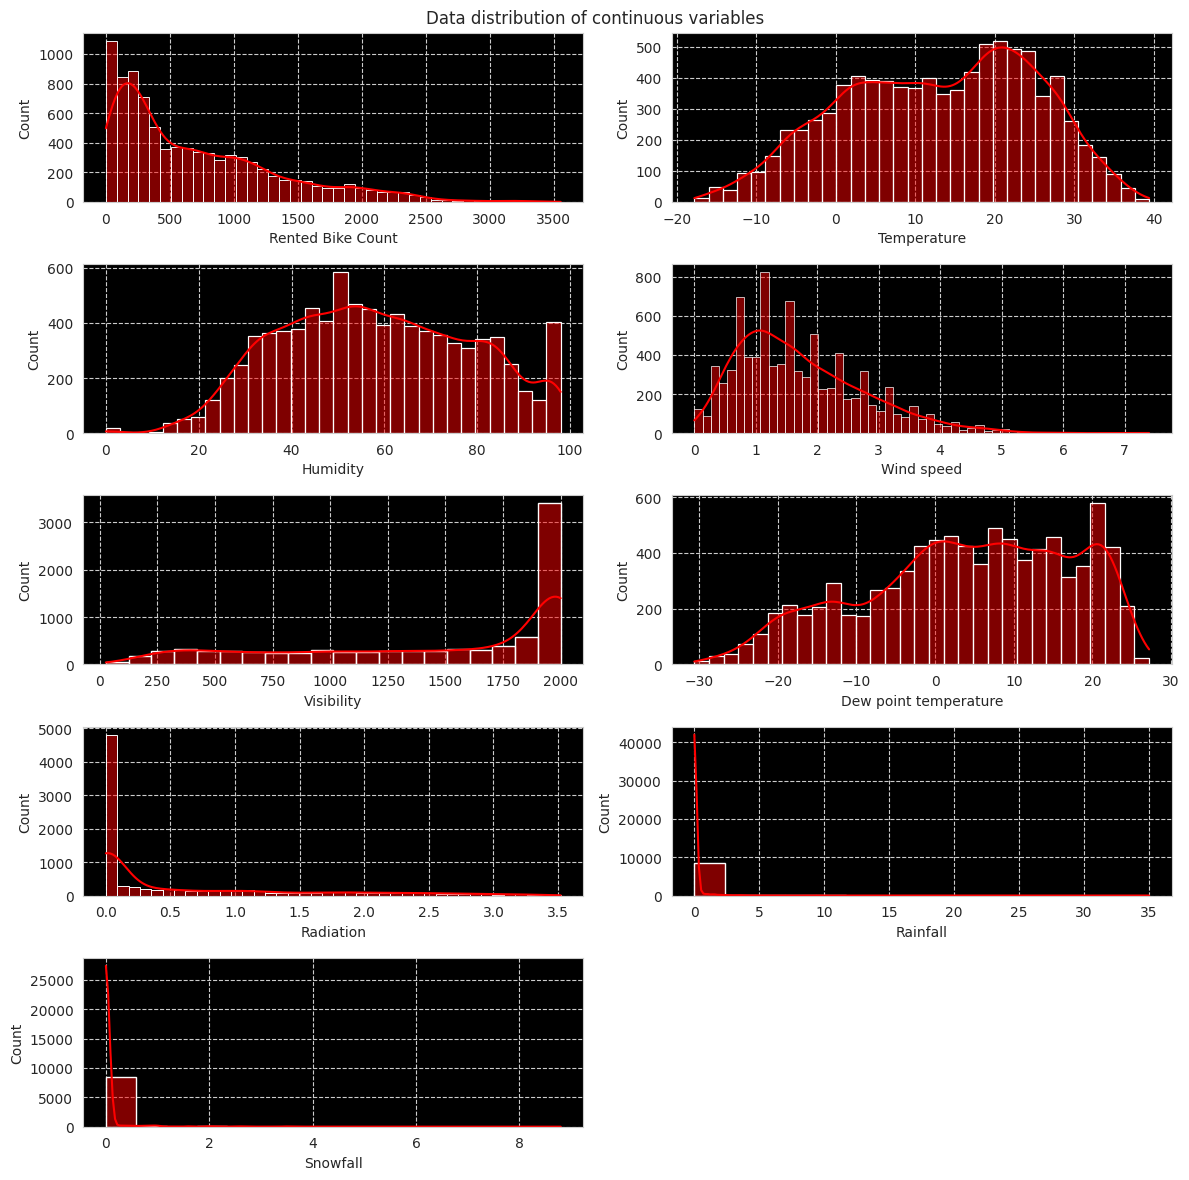

In [27]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

We plotted above graph to know Count and all data sets of different type of Bike,Data distribution of continuous variables in the dataset



##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most of the bike have count and all data set is very rare .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

As we can see that Bike count , Rented Bike Count is highest and  , Snowfall is lowest in number. So it's quite intersting to see weather these assortments and Bike will also get the heighest in analysis also!

#### Chart - 4

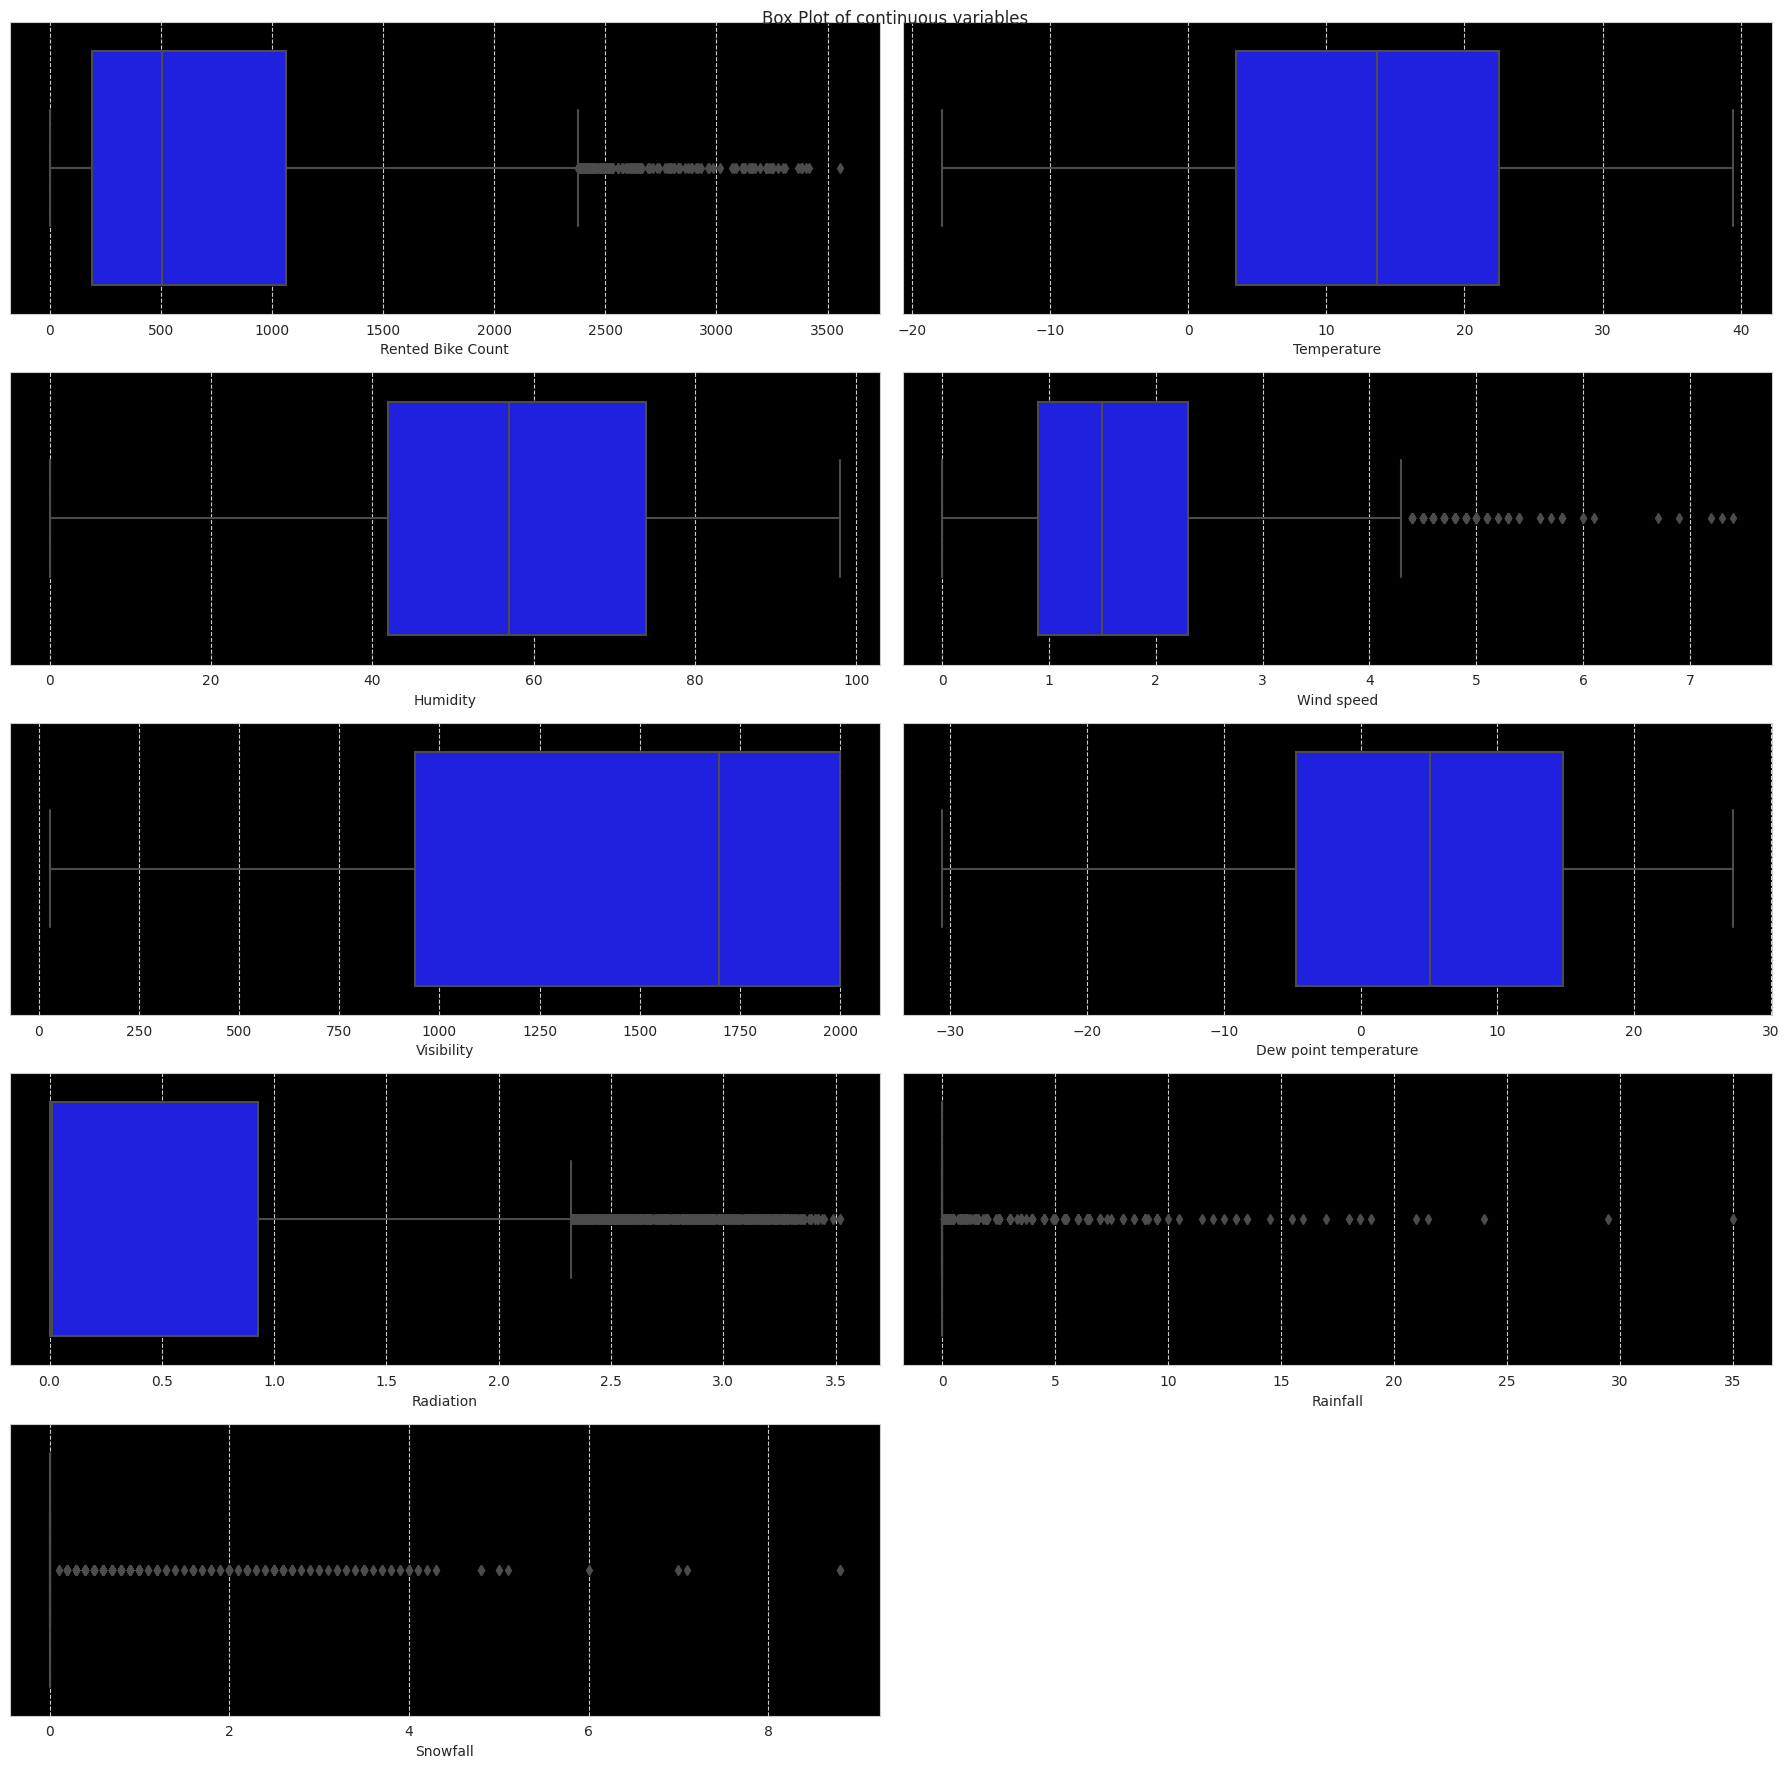

In [28]:
# Chart - 4 visualization code
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

To know the count of how many bike were made at bike on holiday and on Humidity .

##### 2. What is/are the insight(s) found from the chart?

Answer Here

We can see there is not much difference in Bike. However,Bike is more on holidays . It is possible that holidays are more likely to be associated with going on vacation or parents taking time off work to spend with their children, which could lead to increase in consumer spendings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

As we can see from the graph, it is not making much difference whether there is Rainfall or not. Still, businesses can target Rainfall and run more offers.

#### Chart - 5

In [29]:
# Chart - 5 visualization code
#selecting variables that have data types float and int.
var=list(df.select_dtypes(include=['float64','int64']).columns)

In [30]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

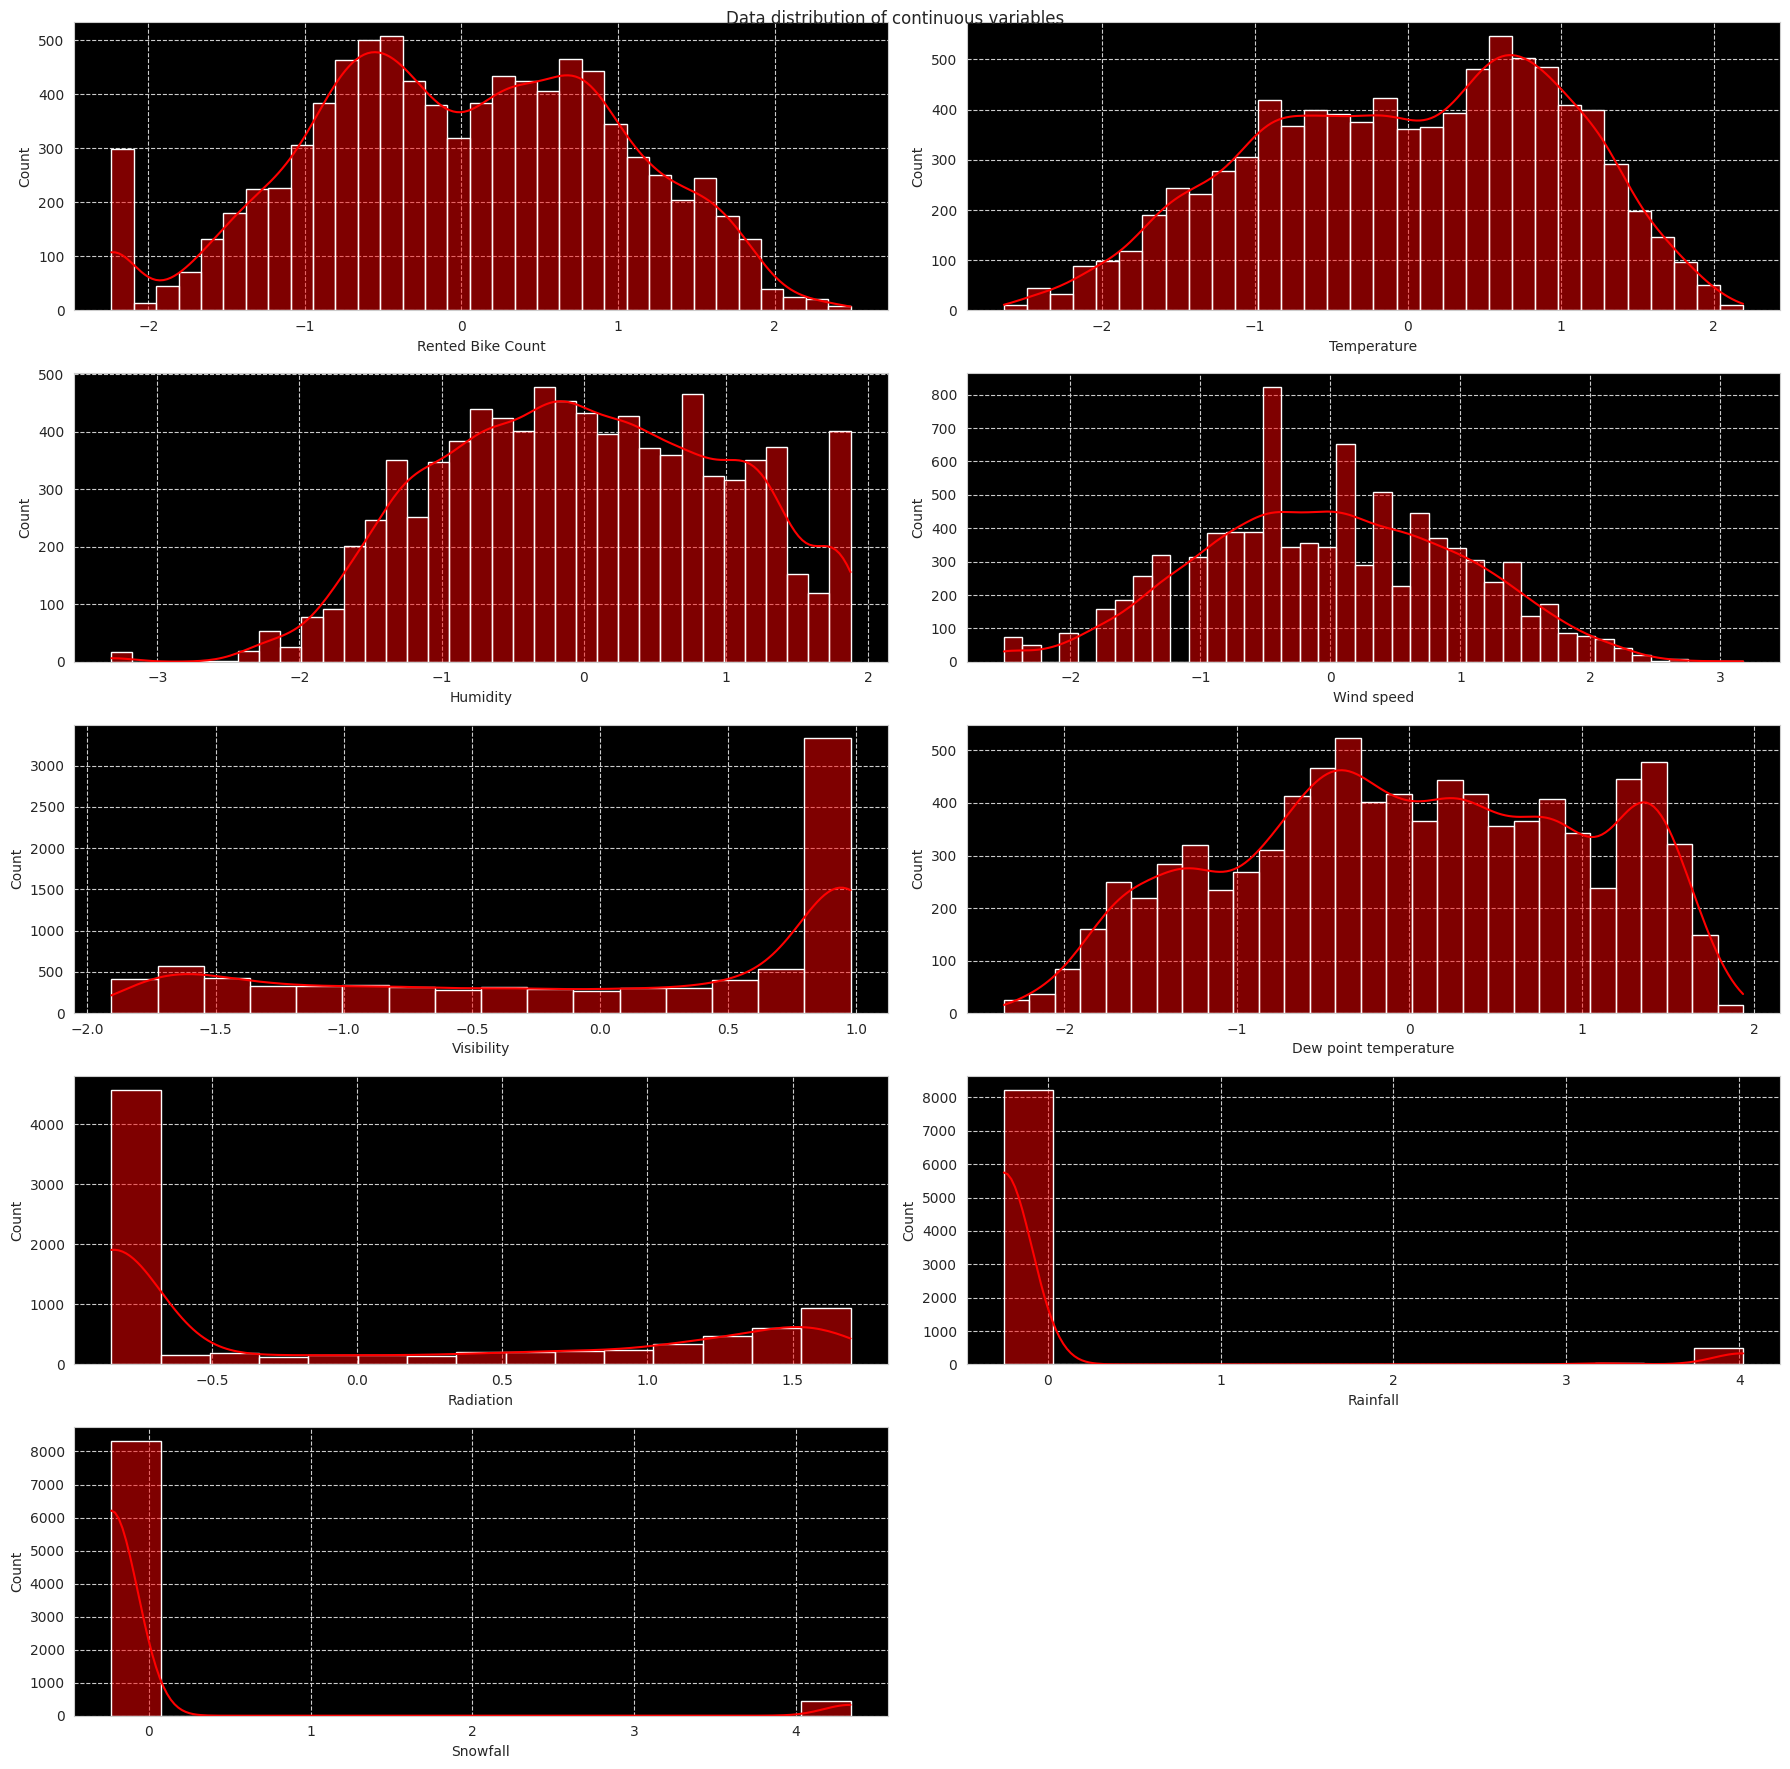

In [31]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

We plotted above graph to know Count and all data sets of different type of Bike,Data distribution of continuous variables in the dataset

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most of the bike have count and all data set is very rare

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

As we can see that Bike count , Temperture, Humidity, Dew to Temperture is highest and  , Snowfall and Rainfall is lowest in number. So it's quite intersting to see weather these assortments and Bike will also get the heighest in analysis also!

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(7,7))

plots=sns.barplot(x=df['Rented Bike Count'],y=df['Visibility'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

To know the relationship between the Rented Bike Count and Visibility.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the above barplot it can be observed that mostly the Rented bike weren't that far from each other and the bike densely located near each other saw more bike.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

As we can see Rented bike are more for densely located stores.So, stores can continue providing exciting offers and services to attract customers to compete the market.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
Visibility = [12, 30, 1, 8, 22]
Humiditiy = [28, 6, 16, 5, 10]
FunctioningDay = [29, 3, 24, 25, 17]

# Set position of bar on X axis
br1 = np.arange(len(Visibility))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Visibility, color ='r', width = barWidth,
        edgecolor ='white', label ='Visibility')
plt.bar(br2, Humiditiy, color ='g', width = barWidth,
        edgecolor ='red', label ='Humiditiy')
plt.bar(br3, FunctioningDay, color ='b', width = barWidth,
        edgecolor ='yellow', label ='FunctioningDay')

# Adding Xticks
plt.xlabel('Hour', fontweight ='bold', fontsize = 15)
plt.ylabel('Rented Bike Count', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Visibility))],
        ['2015', '2016', '2017', '2018', '2019'])

plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

To know the patterns or trends in the data, such as a peak in activity or Rented Bike Count during a particular Hour.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The countplot highlights that Visibility (2016) being a festive month attracts more bike than the rest of the months. Also,  has slightly more Rented bike than other months. This could be due to the 'Holiday' Rented bike which is very popular across the globe

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, definitely these insights create a positive rented bike impact as bike owners will try to keep more goods to cater with the bike needs and also they can increase the revenue by keeping store open even on weekends or holidays as customers are aiming to rented bike more in this period of year.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
season_var=pd.crosstab(index=df['Seasons'],columns='% observations')
plt.pie(season_var['% observations'],labels=season_var['% observations'].index,autopct='%.0f%%')
plt.title('Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

We choose the pie chart as it represents the contribution of each part of the data to a whole where the arc size of each slice is directly proportional to the contribution of that part of Summer, Spring, Winter,Autumn.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

.We see that 25% of Rented bike are into Summer and 25% Winter and 25% Autumn and 25% Spring of Rented bike   .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Later we will see if their is any impact of holiday on Rented Bike.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
Functioning_Day_var=pd.crosstab(index=df['Functioning Day'],columns='% observations')
plt.pie(Functioning_Day_var['% observations'],labels=Functioning_Day_var['% observations'].index,autopct='%.0f%%')
plt.title('Functioning Day')
plt.show()

In [ ]:
holiday_var=pd.crosstab(index=df['Holiday'],columns='% observations')
plt.pie(holiday_var['% observations'],labels=holiday_var['% observations'].index,autopct='%.0f%%')
plt.title('Holiday')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

We choose the pie chart as it represents the Functioning day and Holiday of each part of the data to a whole where the arc size of each slice is directly proportional to the contribution of that part

##### 2. What is/are the insight(s) found from the chart?

Answer Here
We see that 97% of yes and 3% no in Functioning day Rented bike.

we see that 95% of no Holiday and 5% in Holiday.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
sns.barplot(x=season_var.index,y=season_var['% observations'])
plt.title('Seasons')
plt.show()


In [ ]:
X=df.iloc[:,2:]
y=df.iloc[:,1]

##### 1. Why did you pick the specific chart?

Answer Here.
We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to Autumn, Spring, Summer, Winter information to the Seasons.



##### 2. What is/are the insight(s) found from the chart?

Answer Here

Day 1 and day 7 witness the highest rented bike indicating they are holiday falling on the weekend. Day 2 to day 6 generate medium to low rented bike indicating they are probably weekdays where customer Winter is low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Spring have good number of days so we can hire more staff specially for these days and delivery bike for more revenue.

#### Chart - 11

In [ ]:
#ploting cat plot for more info
sns.catplot(x='Rainfall',y='Rented Bike Count',data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

It can give multiple visual aids in a single frame and various insights related to the data can be gained in one single look.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

We choose the catplot as it represents the Rented Bike Count and Rainfall of each part of the data to a whole where the arc size of each slice is directly proportional to the contribution of that part

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes.By plotting catploting we got to know which features are impacting more on bike aiming for maximum Rented bike.

#### Chart - 12 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True,center = 0)
plt.show()

 1. Why did you pick the specific chart?

Answer here.

We see that data Correlation data is telling us the relation: of all the data.

#### Chart - 13 -

In [ ]:
# ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

##### 1. Why did you pick the specific chart?

Answer Here.

To know the average rented bike for each year since a competitor opened near the store .

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the Plot we can tell that Sales are high during the 18, as there are very few store were operated of bike so there is less competition and rented bike are high purches. But as year pass on number of stores increased that means competition also increased and this leads to decline in the rented.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["Rented Bike Count"].head(60)
second_sample = df["Humidity"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

##### Which statistical test have you done to obtain P-Value?

Answer Here.

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

Answer Here.

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Rented bike features we got Correlation coefficient as 0.429 which implies that theses two features are having strong positive correlation between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null Hypothesis - There is no relation between Holiday and Rainfall

2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["Rainfall"].head(60)
second_sample = df["Holiday"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

##### Why did you choose the specific statistical test?

Answer Here.

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value NAN.Here we can see that after applying test on DayOfWeek and sales features we got Correlation coefficient as NAN which implies that theses two features are having weak negative correlation between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

We have used bike Correlation test to obtain P-Value along with rented bike Correlation coefficient value.It is a measure of linear correlation between two sets of data.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["Humidity"].head(60)
second_sample = df["Visibility"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

##### Which statistical test have you done to obtain P-Value?

Answer Here.
We have used bike Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

Answer Here.

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Rented Biek features we got Correlation coefficient as 0.785 which implies that theses two features are having weak positive correlation between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
df.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

We have checked the outliers by plotting the box plot and then replaced the null values of various variables with mean, median,mode and 0 accordingly.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(15,10))

plt.ylabel('Visibility')
sns.boxplot(x=np.sqrt(df['Visibility']))
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

Let's define a code to detect the number of outliers and percentage of outliers present in each of the feature in order to handle them accordingly.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
categorical_features= df.select_dtypes(include='object')

In [ ]:
categorical_features

In [ ]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

We have used one-hot encoding technique to change our categorical features of object type into int type by creating their dummies so that it becomes compatible to feed it into various ML algorithms in future.

we have 3 to 4 unique orderless categories in all the categorical features (which is less in number). So, it is good to use Nominal encoding technique than ordinal.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new
# Checking the first five observation of the dataset we have to deal with.
df.head()

In [ ]:
# Extracting date, month and year from Date feature
df["Day"]= df["Date"].dt.day
df["Month"]= df["Date"].dt.month
df["Year"]= df["Date"].dt.year
df["Week"]= df["Date"].dt.week

#### 2. Feature Selection

In [ ]:
# Let's see how Rented Bike Count and other features are related
for col in df.describe().columns.tolist():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="yellow")
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)
    plt.show()

##### What all feature selection methods have you used  and why?

In [ ]:
# Select your features wisely to avoid overfitting
plt.figure(figsize=(20,15))
sns.heatmap(abs(round(df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)



Answer Here.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X.select_dtypes(include=['float','int']))

In [ ]:
#Dew Point Temperature is highly correlated .let's delete this variable and check the VIF score again.
del X['Dew point temperature']

In [ ]:
calc_vif(X.select_dtypes(include=['float','int']))
#Each variable is within the range between 1 and 5.

##### Which all features you found important and why?

Answer Here.

"Date","Temperature","Humidity","Wind speed","Visibility","Radiation","Rainfall","Snowfall","Dew point temperature","v","Holiday", as our final features as they are highly corelated with the target variable (Rented Bike Count) and no two features are providing the same information.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
sns.distplot(df['Rented Bike Count'])

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented Bike Count']))

### 6. Data Scaling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Separating "x" and "y" variables
X= df[['Date']]
y= df[['Rented Bike Count']]

print(X.shape)
print(y.shape)

In [ ]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating object
std_regressor= StandardScaler()

In [ ]:
# Fit and Transform
X= std_regressor.fit_transform(X)

##### Which method have you used to scale you data and why?

Answer Here.

We have used StandardScaler of sklearn library to scale our data. This is important for us, as features on different scales can lead to poor performance or slow convergence. Standardizing the features also makes it easier to compare different features or observe the effect of a feature on the target variable("Rented Bike Count") by comparing the magnitude of its coefficient. Additionally, we are going to apply linear regression model for which having normally distributed data is the statistical assumption of the model, which standardization can help enforce.

### 8. Data Splitting

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
# Checking the shape after spliting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

##### What data splitting ratio have you used and why?

Answer Here.

Since our dataset is huge and have nearly obsevations. So, We have assigned 80% data into train set and 20% into the test set with random_state=0 so that we do not get different observations in every split.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error


# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)
  print("-"*50)

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

#creating dictionary for storing different models accuracy
model_comparison={}

# Fit the Algorithm
model=LinearRegression()
model.fit(X_train,y_train)

# Predict on the model
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]


In [ ]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()

# Fit the Algorithm
linear_regressor.fit(X_train,y_train)

# Predict the model
y_train_regression_pred= linear_regressor.predict(X_train)
y_test_regression_pred= linear_regressor.predict(X_test)

In [ ]:
# Checking the coefficients
linear_regressor.coef_

In [ ]:
# Checking the intercept
linear_regressor.intercept_


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_regression_pred,y_test,y_test_regression_pred)

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
residuals = y_test - y_test_regression_pred
Mean= round(np.mean(residuals),2)
Median= round(np.median(residuals),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=Mean)
plt.axhline(y=np.nanmedian(residuals), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

# RIDGE REGRESSION

In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
ridge= Ridge()

# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}

# Train the model
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(X_train,y_train)

# Predict the output
y_train_ridge_pred = ridgeR.predict(X_train)
y_test_ridge_pred = ridgeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {ridgeR.best_params_}")
print(f"Negative mean square error is: {ridgeR.best_score_}")



In [ ]:
# Calculating regression metrics for Ridge
regression_metrics(y_train,y_train_ridge_pred,y_test,y_test_ridge_pred)

#  LASSO REGRESSION

In [ ]:
# import lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
lasso= Lasso()

# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}

# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(X_train,y_train)

# Predict the output
y_train_lasso_pred = lassoR.predict(X_train)
y_test_lasso_pred = lassoR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

In [ ]:
# Calculating regression metrics for Lasso
regression_metrics(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method





##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

Despite using Lasso, Ridge and Elastic net models, we couldn't see any significant improvement in the r2 score, MSE and on MAPE as well. This provoked us to go for higher and more complex ML models like Decision trees, Random Forest, XGBoost Regression and LightGBM Regression.



### ML Model - 2
# DECISION TREE

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
TreeR = DecisionTreeRegressor(max_depth=16)

# fit the regressor with X and Y data
TreeR.fit(X_train, y_train)

# predict the model
y_train_tree_pred= TreeR.predict(X_train)
y_test_tree_pred= TreeR.predict(X_test)

In [ ]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_tree_pred,y_test,y_test_tree_pred)

In [ ]:
# Importing libraries for visualizing decison tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_tree_pred= y_test_tree_pred.reshape(-1,1)
residuals_DT = y_test - y_test_tree_pred
Mean= round(np.mean(residuals_DT),2)
Median= round(np.median(residuals_DT),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="lightgreen")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_DT), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_DT), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# import ridge regression from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
decision_tree= DecisionTreeRegressor()

# Defining parameters
parameters= {'max_depth': [16,17,18], 'min_samples_leaf': [6,7,8], 'min_samples_split': [1,2,4]}

# Train the model
decision_treeR = GridSearchCV(decision_tree, parameters, scoring='neg_mean_squared_error', cv=3)
decision_treeR.fit(X_train,y_train)
# Predict the output
y_train_grid_Dtree_pred = decision_treeR.predict(X_train)
y_test_grid_Dtree_pred = decision_treeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {decision_treeR.best_params_}")
print(f"Negative mean square error is: {decision_treeR.best_score_}")




In [ ]:
# Calculating Regression Metrics
regression_metrics(y_train,y_train_grid_Dtree_pred,y_test,y_test_grid_Dtree_pred)


1. Which hyperparameter optimization technique have you used and why?

Answer here.

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.



2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be {'max_depth': 18, 'min_samples_leaf': 6, 'min_samples_split': 2} which resulted into the improvement in the MSE from 0.48 on the test set. Also MAPE is further reduced from 239% to 187% and capturing variance more i.e of the test dataset. At this point of time we have achieved above 87% accuracy by hyperparameter tuning of Decision trees.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

In order to minimise the errors between actual and predicted values, we evaluate our ML model using different metrics. All these metrics try to give us an indication on how close we are with the real/expected output. In our case, each evaluation metric is showing not much difference on the train and test data which shows that our model is predicting a closer expected value.

# ML Model-3
# RANDOM FOREST

In [ ]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=100, max_depth=18)

# fit the regressor with X and Y data
RF_TreeR.fit(X_train, y_train)

# predict the model
y_train_RFtree_pred= RF_TreeR.predict(X_train)
y_test_RFtree_pred= RF_TreeR.predict(X_test)

In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_RFtree_pred,y_test,y_test_RFtree_pred)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_RFtree_pred= y_test_RFtree_pred.reshape(-1,1)
residuals_RF = y_test - y_test_RFtree_pred
Mean= round(np.mean(residuals_RF),2)
Median= round(np.median(residuals_RF),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_DT, c="tomato")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_RF), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_RF), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

In [ ]:
# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge instance
RF_tree= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[100], 'max_depth': [17,19,20], 'min_samples_leaf': [1, 2]}

# Train the model
RF_treeR = RandomizedSearchCV(RF_tree, parameters, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
RF_treeR.fit(X_train,y_train)

# Predict the output
y_train_grid_RFtree_pred = RF_treeR.predict(X_train)
y_test_grid_RFtree_pred = RF_treeR.predict(X_test)
# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {RF_treeR.best_params_}")
print(f"Negative mean square error is: {RF_treeR.best_score_}")


In [ ]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_grid_RFtree_pred,y_test,y_test_grid_RFtree_pred)


1.Which hyperparameter optimization technique have you used
and why?






Answer here.

We have used RandomizedSearchCV in Random Forest since we have huge dataset and it is good for huge and complex models where we just want to select random parameters from the bag of parameters. It reduces the processing and training time by taking the random subsets of the provided parameters wihout compromising the accuracy of the model.

2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Anser here.

After using RandomizedSearchCV with different hyperparameters we saw that their is not much significant improvement observed. Although MSE on test dataset has been reduced from 14 to 13.


# ML Model-4
# XG BOOST REGRESSION

In [ ]:
# import the regressor
from xgboost import XGBRegressor

# create a regressor object
xgbR = XGBRegressor(learning_rate=0.2, max_depth=10)

# fit the regressor with X and Y data
xgbR.fit(X_train, y_train)

# predict the model
y_train_xgbR_pred= xgbR.predict(X_train)
y_test_xgbR_pred= xgbR.predict(X_test)

In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_xgbR_pred,y_test,y_test_xgbR_pred)

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_xgbR_pred= y_test_xgbR_pred.reshape(-1,1)
residuals_XG = y_test - y_test_xgbR_pred
Mean= round(np.mean(residuals_XG),2)
Median= round(np.median(residuals_XG),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_XG, c="mediumslateblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_XG), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_XG), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()



# 2. Cross- Validation & Hyperparameter Tuning

# XGBoost with RandomizedSearchCV




In [ ]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[12,13]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_Rand_R.fit(X_train,y_train)

# Predict the output
y_train_rand_xgbR_pred = xgb_Rand_R.predict(X_train)
y_test_rand_xgbR_pred = xgb_Rand_R.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")


In [ ]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_rand_xgbR_pred,y_test,y_test_rand_xgbR_pred)


# 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

1. MAPE(Mean Absolute Percentage Error): It is calculated by taking the average of the absolute percentage differences between the predicted values and the actual values. This metric is particularly useful when working with time series data(as in our case), as it allows for easy comparison of forecast accuracy across different scales. With the help of MAPE an analyst can easily explain the percentage error to the stakeholders. This metric is considered as one of the most important regression metric in time series data for a positive business impact.

2. Accuracy: In time series data (Such as predicting Rented Bike Count, etc) the best metric to calculate the accuracy is -138MAPE, which is the average of the absolute percentage differences between the predicted values and the actual values.

# 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Linear_regression","Decision_tree","Random_forest","XGboost"]
MAE_r = [5.49,2.99,2.46,2.89,2.43]
MSE_r = [56.21,19.35,13.9,16.55,12.89]
RMSE_r = [7.49,4.39,3.68,4.06,3.59]
MAPE_r = [6.85,3.69,3.03,3.56,2.99]
r2_r = [0.75,0.91,0.93,0.92,0.94]
accuracy_r = [93.14,96.30,96.96,96.43,97.00]

# Create dataframe from the lists
data = {'Models': models,
        'MAE': MAE_r,
        'MSE': MSE_r,
        'RMSE': RMSE_r,
        'MAPE': MAPE_r,
        'R2': r2_r,
        'Accuracy': accuracy_r
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

 We have chosen XGboost as our final prediction model with hyperparameters {'learning_rate': 0.1, 'max_depth': 13} as it is very clear from above dataframe that it has given the highest accuracy (97%), least MAPE (3%) and maximum r2 score(0.94) on the testing dataset among all other models.

# 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

 XGBoost (eXtreme Gradient Boosting) provides an efficient implementation of the gradient boosting framework. It is designed for both linear and tree-based models, and it is useful for large datasets. The basic idea behind XGBoost is to train a sequence of simple models, such as decision trees, and combine their predictions to create a more powerful model. Each tree is trained to correct the errors made by the previous trees in the sequence and this known as boosting.



### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Importing pickle module
import pickle

In [ ]:
# Save the File
filename='Rossmann_regression.pkl'

# serialize process (wb=write byte)
pickle.dump(xgb_Rand_R,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

# unserialize process (rb=read byte)
Regression_model= pickle.load(open(filename,'rb'))

# Predicting the unseen data(test set)
Regression_model.predict(X_test)

In [ ]:
# Checking if we are getting the same predicted values
y_test_rand_xgbR_pred

# **Conclusion**

Write the conclusion here.

Final Conclusion:

1.In holiday or non-working days there is demands in rented bikes.

2.There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

3.People prefered more rented bikes in the morning than the evening.

4.When the rainfall was less, people have booked more bikes except some few cases.

7.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

8.After performing the various models the lightGBM and Catboost found to be the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the lightGBM and Catboost models !

9.We can use either lightGBM or catboost model for the bike rental stations.